In [11]:
# Import packages
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def get_data():
    '''
    ------------------------
    Input: None
    Output: Assignment data
    ------------------------
    '''
    return np.array([1, 2, 3, 4]), np.array([3, 2, 0, 5])  


def get_basis(x, k):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Polynomial basis features
    Given a dimension this iterates
    through orders [0 to k-1]
    ------------------------
    '''
    grid = np.meshgrid(x, np.arange(k)) 
    return np.power(grid[0], grid[1]).T


def get_sol(X, Y):
    '''
    ------------------------
    Input: Polynomial features
    Output: Least squares solution
    ------------------------
    '''
    return np.linalg.solve(X.T @ X, X.T @ Y)


def get_predictions(X, beta_hat):
    '''
    ------------------------
    Input: 
           1) Polynomial features
           2) Least squares coefficients
    Output: Predictions
    ------------------------
    '''
    return X @ beta_hat


def get_mse(Y, Y_hat):
    '''
    ------------------------
    Input: True values and predicted values
    Output: Mean squared error
    ------------------------
    '''
    return np.sum(np.power(Y-Y_hat, 2))/max(Y.shape)


def run_regression(k, x, y, loss_func):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    ''' 
    phi_x = get_basis(x, k)
    beta_hat = get_sol(phi_x, y)
    y_hat = get_predictions(phi_x, beta_hat)
    
    # Note that the results display the degree/order and not the dimension
    mse = loss_func(y, y_hat)
    results = {'beta_hat': beta_hat, 'y_hat': y_hat, 'mse': mse, 'degree': k - 1}
    
    return(results)


def get_final_results(results):
    '''
    ------------------------
    Input: True values and predicted values
    Output: Mean squared error
    ------------------------
    '''
    mse = pd.DataFrame([result['mse'] for result in results], columns = ['MSE'])
    mse['degree'] = [result['degree'] for result in results]
    mse.set_index('degree', inplace = True)
    
    return(mse)


def plot_results(path, title, k, results, x_lab = "X", y_lab="Y"):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    ''' 
    # Make grids for plot
    x_grid = np.linspace(-5, 5, 100000)
    
    # These iterate through orders/degrees [0 to k-1] using dimension
    x_basis = [get_basis(x_grid, dim) for dim in range(1, k)]
    y_grid = [get_predictions(basis, results[dim]['beta_hat']) for basis, dim in zip(x_basis, range(k))]
    
    # Plots
    # This plots iterate through the orders/degrees [0 to k-1]
    for degree in range(k-1):
        plt.plot(x_grid, y_grid[degree], label = str(degree))
    
    # Add annotations
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title)
    plt.legend()
    
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([-5,8])

    
    # Display and save plot
    plt.show()
    plt.savefig(path)

In [31]:
def main(k):
    '''
    ------------------------
    Input: Dataset and degree
    Output: Assignment data
    ------------------------
    ''' 
    x, y = get_data()
    results = [run_regression(dim, x, y, get_mse) for dim in range(1, k)]
    
    title = 'Polynomial Basis Fits'
    path = os.path.join('.', '..', 'figs', '1_1.png')
    
    df = get_final_results(results)
    plot_results(path, title, k, results)
    
    return(results, df)

0
1
2
3


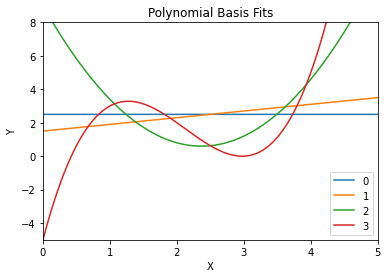

([{'beta_hat': array([2.5]),
   'y_hat': array([2.5, 2.5, 2.5, 2.5]),
   'mse': 3.25,
   'degree': 0},
  {'beta_hat': array([1.5, 0.4]),
   'y_hat': array([1.9, 2.3, 2.7, 3.1]),
   'mse': 3.0500000000000003,
   'degree': 1},
  {'beta_hat': array([ 9. , -7.1,  1.5]),
   'y_hat': array([3.4, 0.8, 1.2, 4.6]),
   'mse': 0.7999999999999992,
   'degree': 2},
  {'beta_hat': array([-5.        , 15.16666667, -8.5       ,  1.33333333]),
   'y_hat': array([3.00000000e+00, 2.00000000e+00, 6.82121026e-13, 5.00000000e+00]),
   'mse': 3.623908669449545e-25,
   'degree': 3}],
                  MSE
 degree              
 0       3.250000e+00
 1       3.050000e+00
 2       8.000000e-01
 3       3.623909e-25)

<Figure size 432x288 with 0 Axes>

In [32]:
main(k=5)